In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [1]:
import pandas as pd
df = pd.read_csv('shiraz_data.csv')

چک کردن داده 
نوع داده 
missing value

In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   نام خیابان                159 non-null    object 
 1   سکانس                     159 non-null    object 
 2   جداره و نما               159 non-null    int64  
 3   کف سازی پیاده روها        159 non-null    int64  
 4   مبلمان شهری               159 non-null    float64
 5   تبلیغات محیطی             159 non-null    int64  
 6   عناصر شهری                159 non-null    int64  
 7   المان های شهری            159 non-null    int64  
 8   جریان سطحی آب و زه کشی    159 non-null    float64
 9   طرح کاشت                  159 non-null    int64  
 10  آسایش محیطی               159 non-null    int64  
 11  اختلاط کاربری             159 non-null    int64  
 12  فعالیت در فضاهای عمومی    159 non-null    int64  
 13  خوانایی فضایی             159 non-null    int64  
 14  دسترس پذیر

,جداره و نما,کف سازی پیاده روها,مبلمان شهری,تبلیغات محیطی,عناصر شهری,المان های شهری,جریان سطحی آب و زه کشی,طرح کاشت,آسایش محیطی,اختلاط کاربری,...,دسترس پذیری,ایمنی و امنیت,اجتماعی,فرهنگی,کل ابعاد کالبدی و فیزیکی,کل ابعاد طبیعی و اکولوژی,کل عملکردی,کل حرکتی,کل اجتماعی و فرهنگی,امتیاز کل
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,7.389937,9.075472,5.733962,3.729560,1.817610,1.213836,4.833333,3.767296,2.037736,4.383648,...,2.132075,1.358491,3.603774,1.949686,33.793711,5.805031,6.157233,10.534591,5.553459,61.844025
std,1.731729,1.816058,1.786087,1.041454,1.168442,1.021074,1.481603,0.994892,1.130065,0.644340,...,0.738740,0.722890,1.079257,1.200204,7.962242,1.801820,1.375806,2.484840,2.002049,13.890228
min,3.000000,5.000000,0.500000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,0.000000,1.000000,0.000000,16.300000,1.000000,3.000000,4.000000,1.000000,28.300000
25%,6.000000,8.000000,4.400000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,4.000000,...,2.000000,1.000000,3.000000,1.000000,27.900000,5.000000,5.000000,9.000000,4.000000,50.400000
50%,8.000000,9.000000,5.700000,4.000000,2.000000,1.000000,5.000000,4.000000,2.000000,4.000000,...,2.000000,1.000000,4.000000,2.000000,35.000000,6.000000,6.000000,11.000000,6.000000,65.200000
75%,9.000000,10.000000,6.850000,5.000000,3.000000,2.000000,6.000000,5.000000,3.000000,5.000000,...,3.000000,2.000000,4.000000,3.000000,38.800000,7.000000,7.000000,12.000000,7.000000,71.200000
max,11.000000,13.000000,9.900000,6.000000,4.000000,4.000000,8.000000,6.000000,5.000000,5.000000,...,3.000000,5.000000,5.000000,4.000000,51.300000,10.000000,9.000000,16.000000,9.000000,89.900000


In [ ]:
pd.options.display.float_format = "{:.2f}".format

نوع داده ها درست است و مقدار گمشده ای وجود ندارد.

حداکثر مقادیر ممکن 

In [141]:
max_scores = {
    'جداره و نما': 11,
    'کف سازی پیاده روها': 13,
    'مبلمان شهری': 10,
    'تبلیغات محیطی': 6,
    'عناصر شهری': 5,
    'المان های شهری':6,
    'جریان سطحی آب و زه کشی':4,
    'طرح کاشت':5,
    'آسایش محیطی':5,
    'اختلاط کاربری':5,
    'فعالیت در فضاهای عمومی':5,
    'خوانایی فضایی':10,
    'دسترس پذیری':3,
    'ایمنی و امنیت':2,
    'اجتماعی':5,
    'فرهنگی':5,
    'کل ابعاد طبیعی و اکولوژی':10,
    'کل ابعاد کالبدی و فیزیکی':55,
    'کل عملکردی':10,
    'کل حرکتی':15,
    'کل اجتماعی و فرهنگی':10,
    'امتیاز کل':100


}

In [43]:
df.columns

Index(['نام خیابان', 'سکانس', 'جداره و نما', 'کف سازی پیاده روها',
       'مبلمان شهری', 'تبلیغات محیطی', 'عناصر شهری', 'المان های شهری',
       'جریان سطحی آب و زه کشی', 'طرح کاشت', 'آسایش محیطی', 'اختلاط کاربری',
       'فعالیت در فضاهای عمومی', 'خوانایی فضایی', 'دسترس پذیری',
       'ایمنی و امنیت', 'اجتماعی', 'فرهنگی', 'کل ابعاد کالبدی و فیزیکی',
       'کل ابعاد طبیعی و اکولوژی', 'کل عملکردی', 'کل حرکتی',
       'کل اجتماعی و فرهنگی', 'امتیاز کل', 'جداره و نما_نرمال',
       'کف سازی پیاده روها_نرمال', 'مبلمان شهری_نرمال', 'تبلیغات محیطی_نرمال',
       'عناصر شهری_نرمال', 'المان های شهری_نرمال',
       'جریان سطحی آب و زه کشی_نرمال', 'طرح کاشت_نرمال', 'آسایش محیطی_نرمال',
       'اختلاط کاربری_نرمال', 'فعالیت در فضاهای عمومی_نرمال',
       'خوانایی فضایی_نرمال', 'دسترس پذیری_نرمال', 'ایمنی و امنیت_نرمال',
       'اجتماعی_نرمال', 'فرهنگی_نرمال'],
      dtype='object')

In [72]:
for col in df.columns:
    if col in max_scores:
        invalid = df[df[col] > max_scores[col]]
        if not invalid.empty:
            print(f"{col}: {len(invalid)} rows above max ({max_scores[col]})")


 تعدادی از داده های رندومی که ایجاد شده بودند از حداکثر بیشتر بوده اند.
 در نتیجه نیاز به اصلاح دارند .

راه اول : استفاده از 
clip 

چون داده ها رندوم تولید شده اند این روش منطقی می باشد که داده های بیشتر از حداکثر را به حداکثر برسانیم

 راه دوم : حذف ردیف های بیشتر از حداکثر 
 این روش مورد تایید نیست چون داده ها مورد نیاز هستند
 
 بازنمونه‌گیری (Rescale):راه حل سوم 
 
   به نسبت حداکثر مقیاس دهی مجدد انجام میشود چون داده ها رندوم است

   روش 1 گزینه بهینه تری است.

In [73]:
for col in [ 'جریان سطحی آب و زه کشی','طرح کاشت','ایمنی و امنیت']:
    df[col] = df[col].clip(upper=max_scores[col])


خلاصه آماری داده 

In [74]:
df.describe()

,جداره و نما,کف سازی پیاده روها,مبلمان شهری,تبلیغات محیطی,عناصر شهری,المان های شهری,جریان سطحی آب و زه کشی,طرح کاشت,آسایش محیطی,اختلاط کاربری,...,دسترس پذیری,ایمنی و امنیت,اجتماعی,فرهنگی,کل ابعاد کالبدی و فیزیکی,کل ابعاد طبیعی و اکولوژی,کل عملکردی,کل حرکتی,کل اجتماعی و فرهنگی,امتیاز کل
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,7.389937,9.075472,5.733962,3.729560,1.817610,1.213836,3.742138,3.761006,2.037736,4.383648,...,2.132075,1.320755,3.603774,1.949686,33.793711,5.805031,6.157233,10.534591,5.553459,61.844025
std,1.731729,1.816058,1.786087,1.041454,1.168442,1.021074,0.618428,0.983787,1.130065,0.644340,...,0.738740,0.598741,1.079257,1.200204,7.962242,1.801820,1.375806,2.484840,2.002049,13.890228
min,3.000000,5.000000,0.500000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,0.000000,1.000000,0.000000,16.300000,1.000000,3.000000,4.000000,1.000000,28.300000
25%,6.000000,8.000000,4.400000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,4.000000,...,2.000000,1.000000,3.000000,1.000000,27.900000,5.000000,5.000000,9.000000,4.000000,50.400000
50%,8.000000,9.000000,5.700000,4.000000,2.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,2.000000,1.000000,4.000000,2.000000,35.000000,6.000000,6.000000,11.000000,6.000000,65.200000
75%,9.000000,10.000000,6.850000,5.000000,3.000000,2.000000,4.000000,5.000000,3.000000,5.000000,...,3.000000,2.000000,4.000000,3.000000,38.800000,7.000000,7.000000,12.000000,7.000000,71.200000
max,11.000000,13.000000,9.900000,6.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,2.000000,5.000000,4.000000,51.300000,10.000000,9.000000,16.000000,9.000000,89.900000


*data visualization*

پرسش ها و انتظاراتم از این بخش : وضعیت کلی معیارها چطور است؟
توزیع معیارهای به چه صورت است؟

تعریف یک تابعی که در نمودارها فراخوانی شود و فونت فارسی بهم نریزد

In [100]:
import arabic_reshaper
from bidi.algorithm import get_display

def fix_farsi(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text


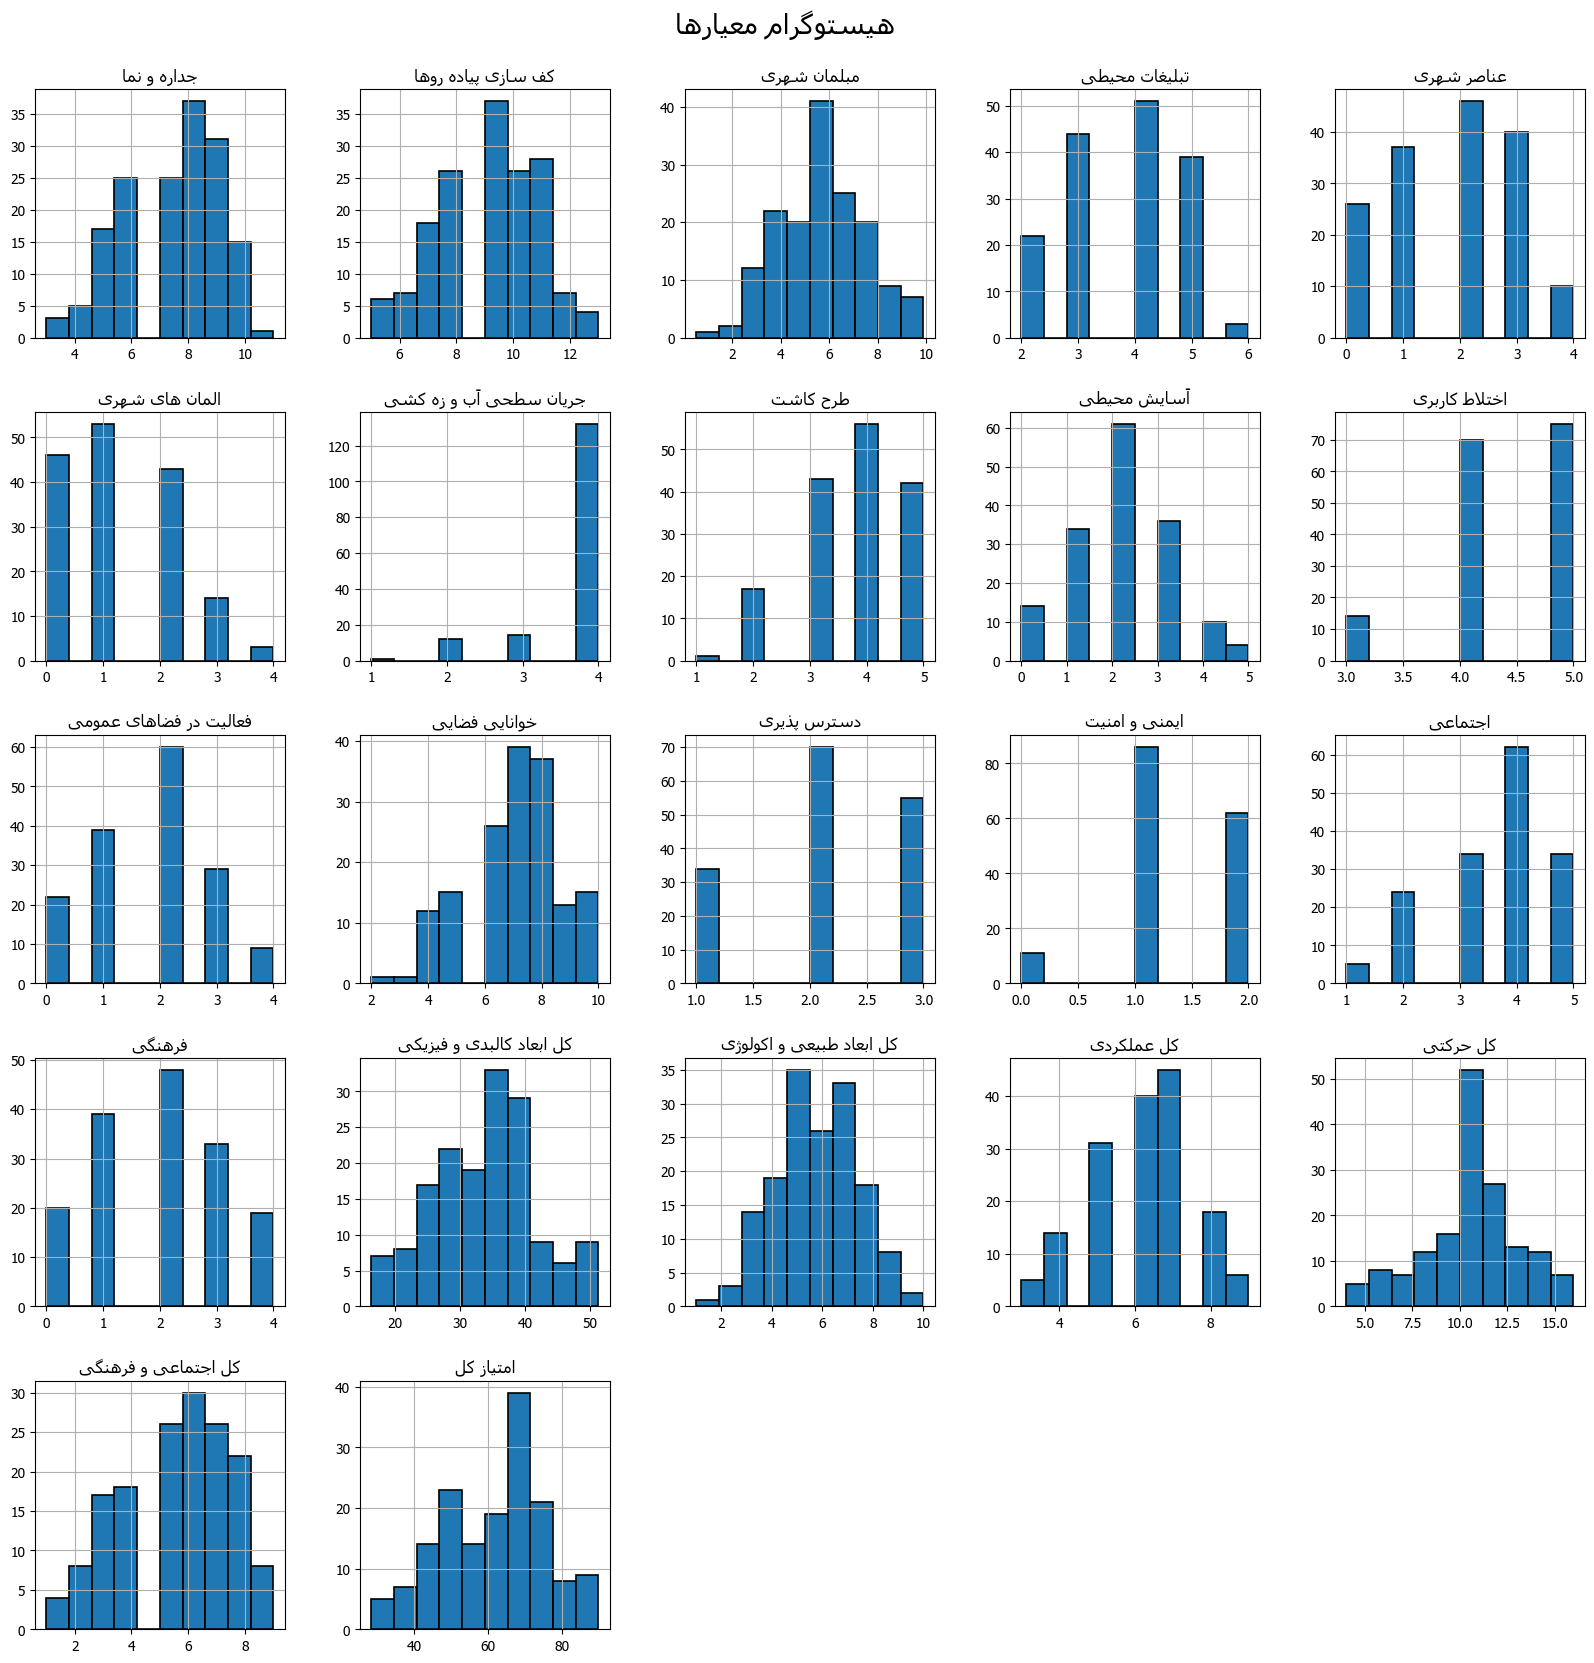

In [107]:
plt.rcParams['font.family'] = 'Tahoma'
numeric_cols = df.select_dtypes(include='number').columns
axes = df[numeric_cols].hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.set_title(get_display(arabic_reshaper.reshape(col)))  
plt.suptitle(get_display(arabic_reshaper.reshape("هیستوگرام معیارها")), fontsize=20, y=0.92)
plt.show()

توزیع ها نرمال نیستن برای معیارا 
 بعضی از معیارها مثل جریان سطحی، اختلاط کاربری مقادیر بالاتری دارن و اغلب دارای نمره بهتری بودند 
 و برخی مثل المان های شهری چولگی مثبت دارند و اغلب نمره کمی گرفته اند . 

In [109]:
df.sekans=df.copy(deep=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1444\30034131.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sekans=df.copy(deep=True)


از آنجایی که هر خیابان چندین سکانی دارد سکانس ها میانگین گیری میشود 

میانگین گیری از سکانس ها برای تحلیل هر خیابان

In [ ]:
df.sekans=df.groupby('نام خیابان')[numeric_cols].mean().reset_index()

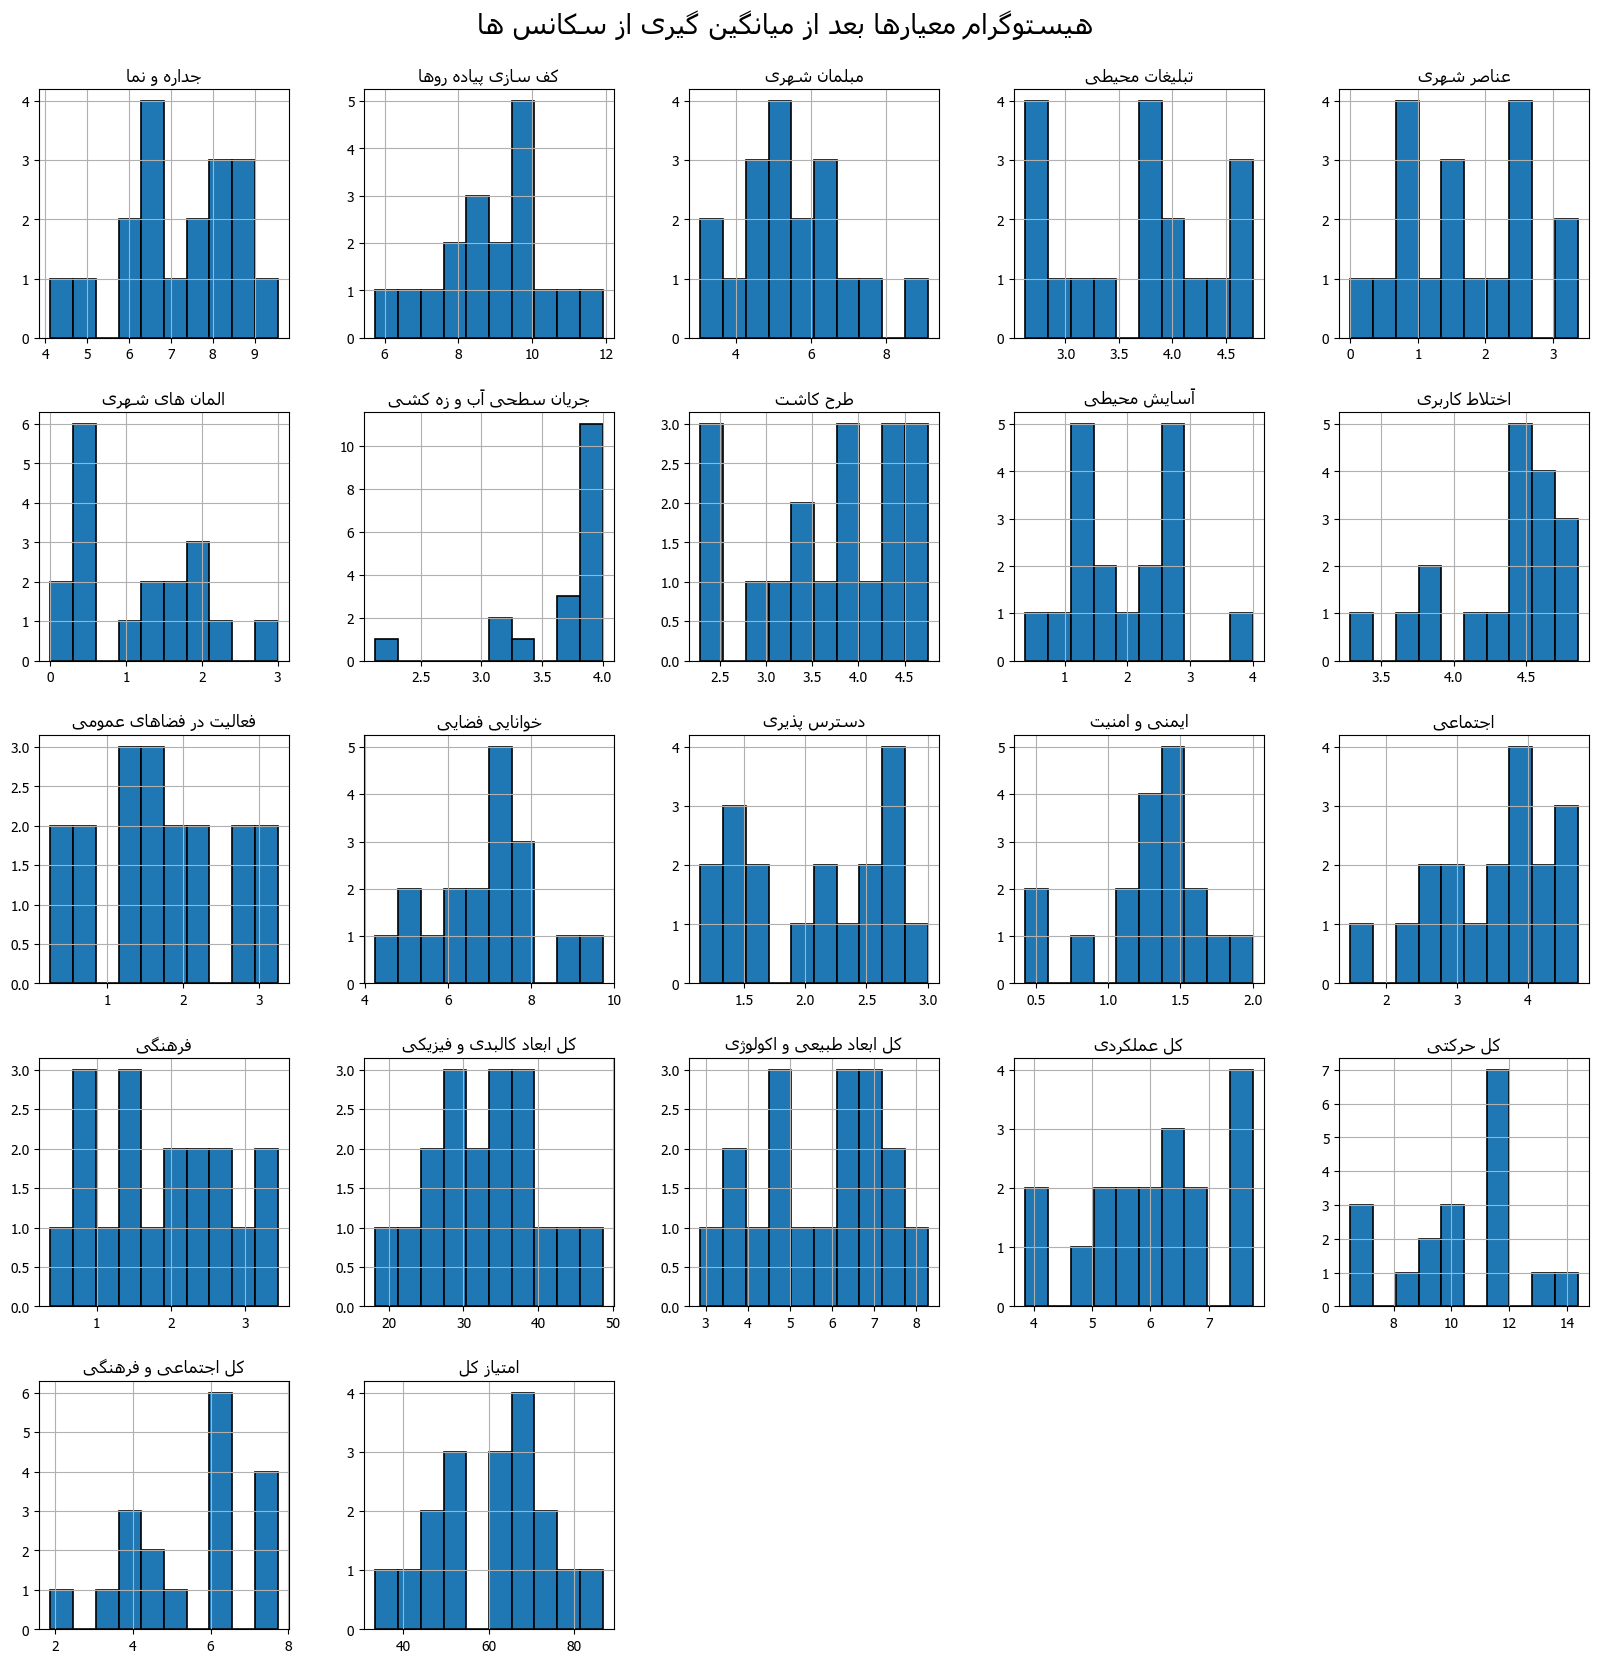

In [112]:
plt.rcParams['font.family'] = 'Tahoma'
numeric_cols = df.sekans.select_dtypes(include='number').columns
axes = df.sekans[numeric_cols].hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
for ax, col in zip(axes.flatten(), numeric_cols):
    ax.set_title(get_display(arabic_reshaper.reshape(col)))  
plt.suptitle(get_display(arabic_reshaper.reshape(" هیستوگرام معیارها بعد از میانگین گیری از سکانس ها")), fontsize=20, y=0.92)
plt.show()

از روی نمودار هیستوگرام مشخص است که توزیع ها نرمال نیست اما از راه آزمون شپیرو هم محاسبه میکنیم

In [134]:
from scipy.stats import shapiro
stat, p = shapiro(df.sekans[numeric_cols])
if p > 0.05:
    print("normal")
else:
    print("not normal")


not normal


In [114]:
#اول نمودار اسکتر پلات رسم کردم نمایش خوبی نمیداد بخاطر تعدد داده تصمیم گرفتم هیت مپ رسم کنم ک ارتباط داده ها رو ببینم


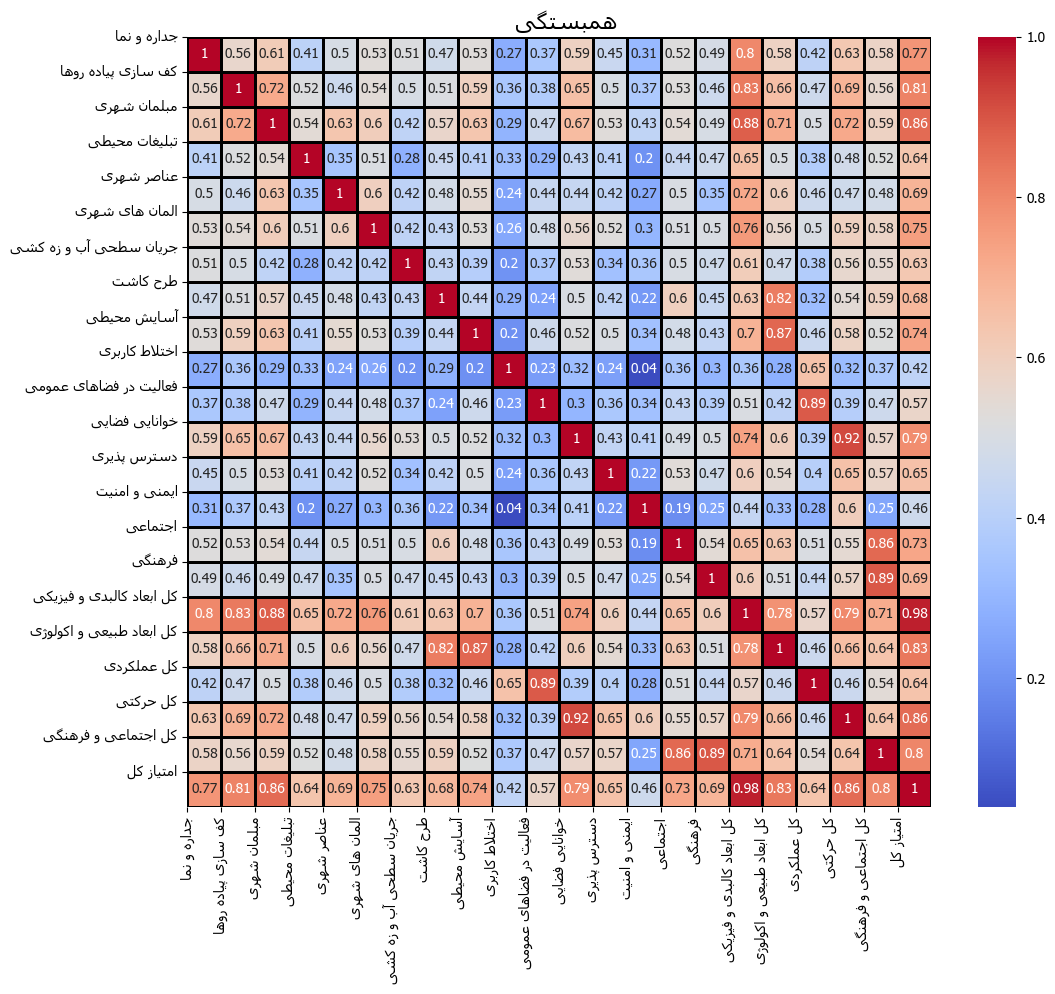

In [119]:
plt.rcParams['font.family'] = 'Tahoma'
def fix_farsi(text):
    return get_display(arabic_reshaper.reshape(text))
corr = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,                
    cmap="coolwarm", 
    linewidths=1, 
    linecolor='black'
)
plt.title(fix_farsi("همبستگی  "), fontsize=16)
plt.xticks(ticks=range(len(corr.columns)), labels=[fix_farsi(c) for c in corr.columns], rotation=90)
plt.yticks(ticks=range(len(corr.columns)), labels=[fix_farsi(c) for c in corr.columns], rotation=0)
plt.show()

بنظر میرسد ابعاد کالبدی و فیزیکی همبستگی و رابطه قوی ای با امتیاز کل هر خیابان دارد

شاخص های مرکزی

In [207]:
numeric_cols = df.sekans.select_dtypes(include='number').columns

stats1 = pd.DataFrame({
    'Mean': df.sekans[numeric_cols].mean(),
    'Median': df.sekans[numeric_cols].median(),
    'Mode': df.sekans[numeric_cols].mode().iloc[0],
})



with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 10000):
    print(stats1)



                          Mean       Median     Mode     
جداره و نما                7.279223   7.486111   4.125000
کف سازی پیاده روها         8.950527   9.100000  10.000000
مبلمان شهری                5.601211   5.395536   3.062500
تبلیغات محیطی              3.691550   3.828571   2.625000
عناصر شهری                 1.725317   1.645833   1.000000
المان های شهری             1.140741   1.150000   0.000000
جریان سطحی آب و زه کشی     3.716027   4.000000   4.000000
طرح کاشت                   3.709023   3.838889   2.285714
آسایش محیطی                1.969202   1.937500   1.285714
اختلاط کاربری              4.359498   4.500000   4.500000
فعالیت در فضاهای عمومی     1.729736   1.690476   0.250000
خوانایی فضایی              6.903830   7.125000   7.800000
دسترس پذیری                2.094635   2.225000   1.500000
ایمنی و امنیت              1.300816   1.366667   1.333333
اجتماعی                    3.548070   3.746032   3.000000
فرهنگی                     1.900998   1.987500   0.888889
کل ابعاد کالبد

بیشترین امتیاز تکراری در جداره و نما 7 از 10 است . خیابان هایی با امتیاز پایین تر میانگین را به 4 رسانده اند. 

کفسازی پیاده رو ها اغلب امتیاز حدودا 9 را از 13 کسب کرده اند . و داده هایی با امتیاز بالاتر میانگین را به 10 رسانده اند. 
مبلمان شهری با بیشترین تکرار عدد حدودا 6 از 10 ، میانگینی بسیار پایین تر حدود 3 دارند که نشان از امتیازهای پایین دارد.

تبلیغات محیطی با مد و میانه حدودا برابر 3 از 6 و میانگین 3 حدودا از توزیع نرمال تری پیروی میکند و حدودا تمام امتیاز های حول 3 میگردند بدین معنا که وضعی کاملا متوسط دارند.

عناصرشهری با مد، میانه 1 و میانگین حدودا 2 از 5 از وضعیت بسیار نامطلوبی برخوردار است.

المان های شهری با میانه و مد 1 و میانگین 0 از 6 نشان از امتیازات بسیار پایینی و وضعیت بد این معیار در خیابان های مورد برداشت دارند.

معیار جریان سطحی با مد و میانه و میانگین حدودا 4 از 4 از وضعیت مطلوبی برخوردا است

 معیار طرح کاشت با مد و میانه حدودا 4 و میانگین 2 از 5 نشان می دهد که توطیع نرمال نیست و داده ها از وضعیت متفاوتی برخوردارند.

 در معیار آسایش محیطی نیز میانه و مد حدودا 2 و میانگین 1 از 5 داده ها از توزیع نرمالی برخوردار نیستند و اغلب وضعیت خوبی ندارند . 

 در معیار اختلاط کاربری اغلب داده ها  در حدود 4.5 از 5 در وضعیت نسبتا خوبی قرار دارند 


معیارهای فرهنگی، فعالیت، المان های شهری همگی در وضعیت بسیار وخیم و حدود میانگین 0 از الویت های بهبود کیفیت خیابان ها هستند.و جریان سطحی
و سپس اختلاط کاربری دارای وضعیت بهتری به نسبت سایر معیارها هستند. 
در بین ابعاد نیز بعد طبیعی با پایین ترین اممتیاز و حرکتی با بالاترین امتیاز هستند.




شاخص های پراکندگی

In [208]:


stats2 = pd.DataFrame({
    'Range': df.sekans[numeric_cols].max() - df.sekans[numeric_cols].min(),
    'Std': df.sekans[numeric_cols].std(),  
    'CV': (df.sekans[numeric_cols].std() / df.sekans[numeric_cols].mean())* 100,
})



with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 10000):
    print(stats2)



                          Range      Std        CV       
جداره و نما                5.420455   1.429776  19.641876
کف سازی پیاده روها         6.159091   1.507765  16.845549
مبلمان شهری                6.046591   1.528569  27.289975
تبلیغات محیطی              2.125000   0.721308  19.539436
عناصر شهری                 3.363636   0.960966  55.697963
المان های شهری             3.000000   0.860453  75.429336
جریان سطحی آب و زه کشی     1.875000   0.496943  13.372961
طرح کاشت                   2.464286   0.808906  21.809138
آسایش محیطی                3.625000   0.871843  44.273931
اختلاط کاربری              1.571429   0.415778   9.537287
فعالیت در فضاهای عمومی     3.000000   0.889033  51.397061
خوانایی فضایی              5.477273   1.402459  20.314214
دسترس پذیری                1.857143   0.600404  28.663891
ایمنی و امنیت              1.571429   0.393822  30.274966
اجتماعی                    3.200000   0.875687  24.680669
فرهنگی                     3.069444   0.903986  47.553232
کل ابعاد کالبد

پراکندگی کم (معیارهای نسبتاً همگن)

اختلاط کاربری  و جریان سطحی آب و زه‌کشی ، پراکندگی کمی دارند، یعنی تقریباً در همه سکانس‌ها وضعیت مشابه است.

کف‌سازی پیاده‌روها  و کل عملکردی  نسبتاً یکنواخت، وضعیت تقریباً مشابه در بیشتر سکانس‌ها.
پراکندگی متوسط

جداره و نما ، خوانایی فضایی  و کل حرکتی  پراکندگی متوسط، برخی سکانس‌ها بهتر یا بدتر از میانگین هستند.
پراکندگی بالا (معیارهای ناهمگن)

المان‌های شهری ، عناصر شهری ، فعالیت در فضاهای عمومی  و فرهنگی پراکندگی بسیار بالا، یعنی وضعیت در سکانس‌ها خیلی متفاوت است و بعضی سکانس‌ها تقریباً صفر هستند.

کل ابعاد کالبدی و فیزیکی  و کل اجتماعی و فرهنگی  پراکندگی قابل توجه، به این معنا که وضعیت کلی سکانس‌ها متفاوت است.

امتیاز کل  پراکندگی متوسط، یعنی بعضی خیابان‌ها یا سکانس‌ها وضعیت خوبی دارند و بعضی ضعیف.

شاخص های موقعیتی

In [209]:
numeric_cols = df.sekans.select_dtypes(include='number').columns

stats3 = pd.DataFrame({
    'Min': df.sekans[numeric_cols].min(),
    'Max': df.sekans[numeric_cols].max(),
    'Q1': df.sekans[numeric_cols].quantile(0.25),
    'Q3': df.sekans[numeric_cols].quantile(0.75),
    'IQR': df.sekans[numeric_cols].quantile(0.75) - df.sekans[numeric_cols].quantile(0.25),
})




with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 10000):
    print(stats3)


                          Min        Max        Q1         Q3         IQR      
جداره و نما                4.125000   9.545455   6.489583   8.364583   1.875000
کف سازی پیاده روها         5.750000  11.909091   7.967857   9.944444   1.976587
مبلمان شهری                3.062500   9.109091   4.532540   6.457292   1.924752
تبلیغات محیطی              2.625000   4.750000   3.027778   4.215278   1.187500
عناصر شهری                 0.000000   3.363636   1.000000   2.527778   1.527778
المان های شهری             0.000000   3.000000   0.432540   1.833333   1.400794
جریان سطحی آب و زه کشی     2.125000   4.000000   3.675000   4.000000   0.325000
طرح کاشت                   2.285714   4.750000   3.177083   4.318182   1.141098
آسایش محیطی                0.375000   4.000000   1.343750   2.555556   1.211806
اختلاط کاربری              3.285714   4.857143   4.250000   4.588889   0.338889
فعالیت در فضاهای عمومی     0.250000   3.250000   1.381250   2.216667   0.835417
خوانایی فضایی              4.250000   9.

معیارهایی با پراکندگی کم 

جریان سطحی آب و زه کشی  و اختلاط کاربری ۵۰٪ داده‌ها نزدیک به هم هستند و وضعیت تقریباً یکنواخت است.

ایمنی و امنیت  پراکندگی بسیار کم، یعنی اکثر سکانس‌ها امتیاز پایینی دارند.

معیارهایی با پراکندگی متوسط

کف‌سازی پیاده‌روها ، خوانایی فضایی ، جداره و نما  داده‌ها متوسطاً پراکنده هستند.

معیارهایی با پراکندگی بالا

المان‌های شهری  و عناصر شهری  نشان‌دهنده ناهماهنگی زیاد بین سکانس‌ها و وجود نقاط صفر یا نزدیک صفر.

فعالیت در فضاهای عمومی  پراکندگی متوسط ولی از نظر مقدار کلی پایین است.

شاخص‌های کلی و جمع‌بندی

کل ابعاد کالبدی و فیزیکی  و امتیاز کل پراکندگی زیاد در سطح کل، یعنی بعضی خیابان‌ها بسیار خوب و برخی ضعیف هستند.

کل حرکتی  و کل اجتماعی و فرهنگی  پراکندگی متوسط، وضعیت متفاوت در سکانس‌ها.

شکل توزیع

In [210]:
numeric_cols = df.sekans.select_dtypes(include='number').columns

stats4 = pd.DataFrame({

    'CV': (df.sekans[numeric_cols].std() / df.sekans[numeric_cols].mean()) * 100,
    'Skewness': df.sekans[numeric_cols].skew()
})




with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 10000):
    print(stats4)


                          CV         Skewness
جداره و نما               19.641876 -0.544108
کف سازی پیاده روها        16.845549 -0.257896
مبلمان شهری               27.289975  0.494182
تبلیغات محیطی             19.539436 -0.068862
عناصر شهری                55.697963  0.055303
المان های شهری            75.429336  0.445896
جریان سطحی آب و زه کشی    13.372961 -2.269731
طرح کاشت                  21.809138 -0.470673
آسایش محیطی               44.273931  0.395770
اختلاط کاربری              9.537287 -1.253404
فعالیت در فضاهای عمومی    51.397061 -0.005408
خوانایی فضایی             20.314214 -0.061921
دسترس پذیری               28.663891 -0.176615
ایمنی و امنیت             30.274966 -0.816787
اجتماعی                   24.680669 -0.722411
فرهنگی                    47.553232  0.074519
کل ابعاد کالبدی و فیزیکی  22.997715  0.013914
کل ابعاد طبیعی و اکولوژی  27.119850 -0.219342
کل عملکردی                18.920183 -0.390475
کل حرکتی                  20.798325 -0.309095
کل اجتماعی و فرهنگی       31.22079

شاخص‌های کم‌پراکندگی 

اختلاط کاربری ، جریان سطحی آب و زه‌کشی ، کف‌سازی پیاده‌روها  و کل عملکردی 

چولگی غالباً منفی است: داده‌ها به سمت مقادیر بالاتر متمرکزند ولی برخی نقاط پایین دارند.
شاخص‌های پراکندگی متوسط 

جداره و نما، خوانایی فضایی، کل حرکتی، کل اجتماعی و فرهنگی، دسترس‌پذیری، ایمنی و امنیت

چولگی منفی متوسط: برخی نقاط کمتر از میانگین و برخی بیشتر، ولی پراکندگی متوسط است.
شاخص‌های پراکندگی زیاد 

المان‌های شهری ، عناصر شهری ، فعالیت در فضاهای عمومی ، فرهنگی ، آسایش محیطی 

چولگی مثبت یا نزدیک صفر: بیشتر سکانس‌ها پایین هستند ولی چند سکانس خوب وجود دارد (برای شاخص‌های مثبت).

این شاخص‌ها ناهمگنی شدید و نقاط ضعف مشخص دارند.


تحلیل نهایی : 

شاخص‌های خوب و یکنواخت: کف‌سازی پیاده‌روها، خوانایی فضایی، اختلاط کاربری، جریان سطحی آب؛ وضعیت تقریباً مناسب و پراکندگی کم.

شاخص‌های ضعیف و پراکنده: المان‌های شهری، عناصر شهری، فعالیت در فضاهای عمومی، فرهنگی، آسایش محیطی؛ نقاط خیلی ضعیف و ناهمگنی زیاد.

شاخص‌های متوسط: جداره و نما، کل حرکتی، کل عملکردی، کل اجتماعی و فرهنگی؛ پراکندگی متوسط، نیاز به بهبود در نقاط ضعیف.

امتیاز کل: وضعیت متوسط، توزیع کمی چپ‌شیب، یعنی بیشتر سکانس‌ها بهتر از میانگین ولی نقاط ضعیف وجود دارد.

normalized

In [211]:
from scipy.stats import boxcox, yeojohnson, skew, kurtosis
numeric_cols = df.sekans.select_dtypes(include='number').columns
df_transformed = df.sekans.copy()
for col in numeric_cols:
    transformed_data, lambda_val = yeojohnson(df.sekans[col])
df_transformed[col] = transformed_data

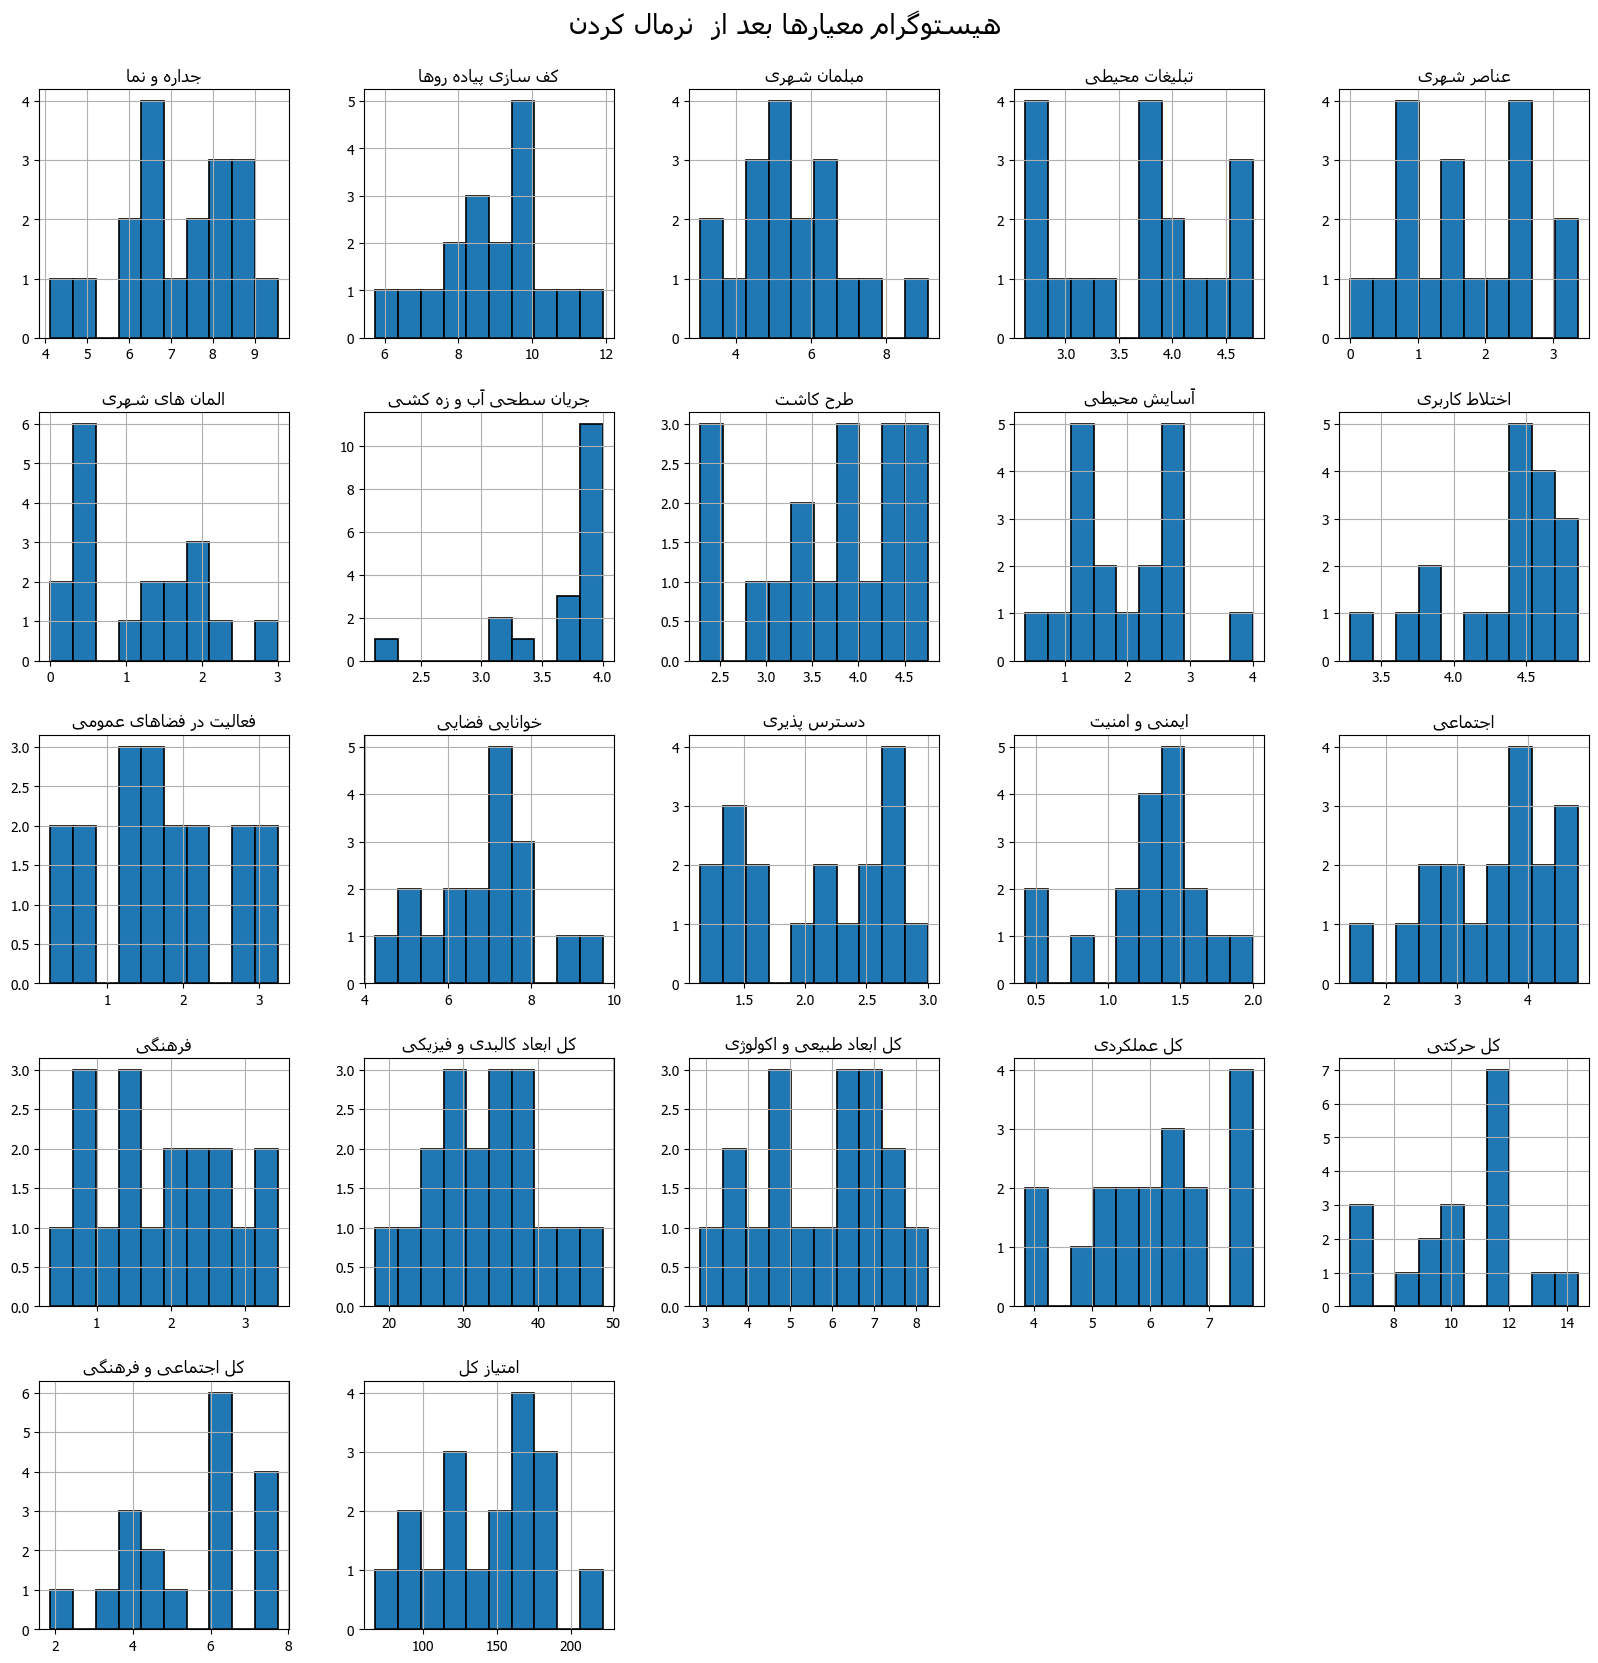

In [212]:
plt.rcParams['font.family'] = 'Tahoma'
numeric_cols_scaled_norm = df_transformed .select_dtypes(include='number').columns
axes =df_transformed [numeric_cols_scaled_norm].hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
for ax, col in zip(axes.flatten(), numeric_cols_scaled_norm):
    ax.set_title(get_display(arabic_reshaper.reshape(col)))  
plt.suptitle(get_display(arabic_reshaper.reshape(" هیستوگرام معیارها بعد از  نرمال کردن")), fontsize=20, y=0.92)
plt.show()

نرمال نشد. 

استنباطی

پرسش : چه پیشنهادهایی برای اولویت بهبود ارائه می شود؟
برای کل خیابان های پرتردد شیراز چه تخمینی از میانگین هر معیار وجود دارد؟

In [230]:
from scipy.stats import bootstrap
import numpy as np
import pandas as pd

In [231]:
numeric_cols = df.sekans.select_dtypes(include='number').columns

In [232]:
results = []

In [233]:
for col in numeric_cols:
    data = (df.sekans[col].values,)   
    res = bootstrap(
        data,
        np.mean,
        confidence_level=0.95,
        n_resamples=5000,
        method='BCa',
        random_state=42
    )
    mean_val = np.mean(data[0])
    ci_low  = res.confidence_interval.low
    ci_high = res.confidence_interval.high
    results.append([col, mean_val, ci_low, ci_high])


In [244]:
ci_df = pd.DataFrame(results, columns=['معیار','mean','ci_lower','ci_upper'])
ci_df

,معیار,mean,ci_lower,ci_upper
0,جداره و نما,7.279223,6.570811,7.860065
1,کف سازی پیاده روها,8.950527,8.240413,9.620598
2,مبلمان شهری,5.601211,4.966099,6.362249
3,تبلیغات محیطی,3.691550,3.363119,4.017644
4,عناصر شهری,1.725317,1.302778,2.173490
5,المان های شهری,1.140741,0.790149,1.573682
6,جریان سطحی آب و زه کشی,3.716027,3.380147,3.871509
7,طرح کاشت,3.709023,3.318146,4.054517
8,آسایش محیطی,1.969202,1.599301,2.409096
9,اختلاط کاربری,4.359498,4.140903,4.519347


In [235]:
def make_bins(max_scores):
    return [0, max_scores*0.33, max_scores*0.66, max_scores]

In [236]:
labels = ['ضعیف', 'متوسط', 'خوب']

In [237]:
ci_df['status'] = ''

In [245]:
for معیار in ci_df['معیار']:
    bins = make_bins(max_scores[معیار])
    ci_df.loc[ci_df['معیار']==معیار, 'status'] = pd.cut(
        ci_df.loc[ci_df['معیار']==معیار, 'mean'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )

ci_df

,معیار,mean,ci_lower,ci_upper,status
0,جداره و نما,7.279223,6.570811,7.860065,خوب
1,کف سازی پیاده روها,8.950527,8.240413,9.620598,خوب
2,مبلمان شهری,5.601211,4.966099,6.362249,متوسط
3,تبلیغات محیطی,3.691550,3.363119,4.017644,متوسط
4,عناصر شهری,1.725317,1.302778,2.173490,متوسط
5,المان های شهری,1.140741,0.790149,1.573682,ضعیف
6,جریان سطحی آب و زه کشی,3.716027,3.380147,3.871509,خوب
7,طرح کاشت,3.709023,3.318146,4.054517,خوب
8,آسایش محیطی,1.969202,1.599301,2.409096,متوسط
9,اختلاط کاربری,4.359498,4.140903,4.519347,خوب


معیارهایی که در وضعیت ضعیف و متوسط هستند، اولویت بهبود دارند.

معیارهای خوب وضعیت قابل قبول دارند و اولویت فوری ندارند.

تمرکز مدیریت شهری می‌تواند روی معیارهایی مثل المان‌های شهری، ایمنی و آسایش محیطی باشد

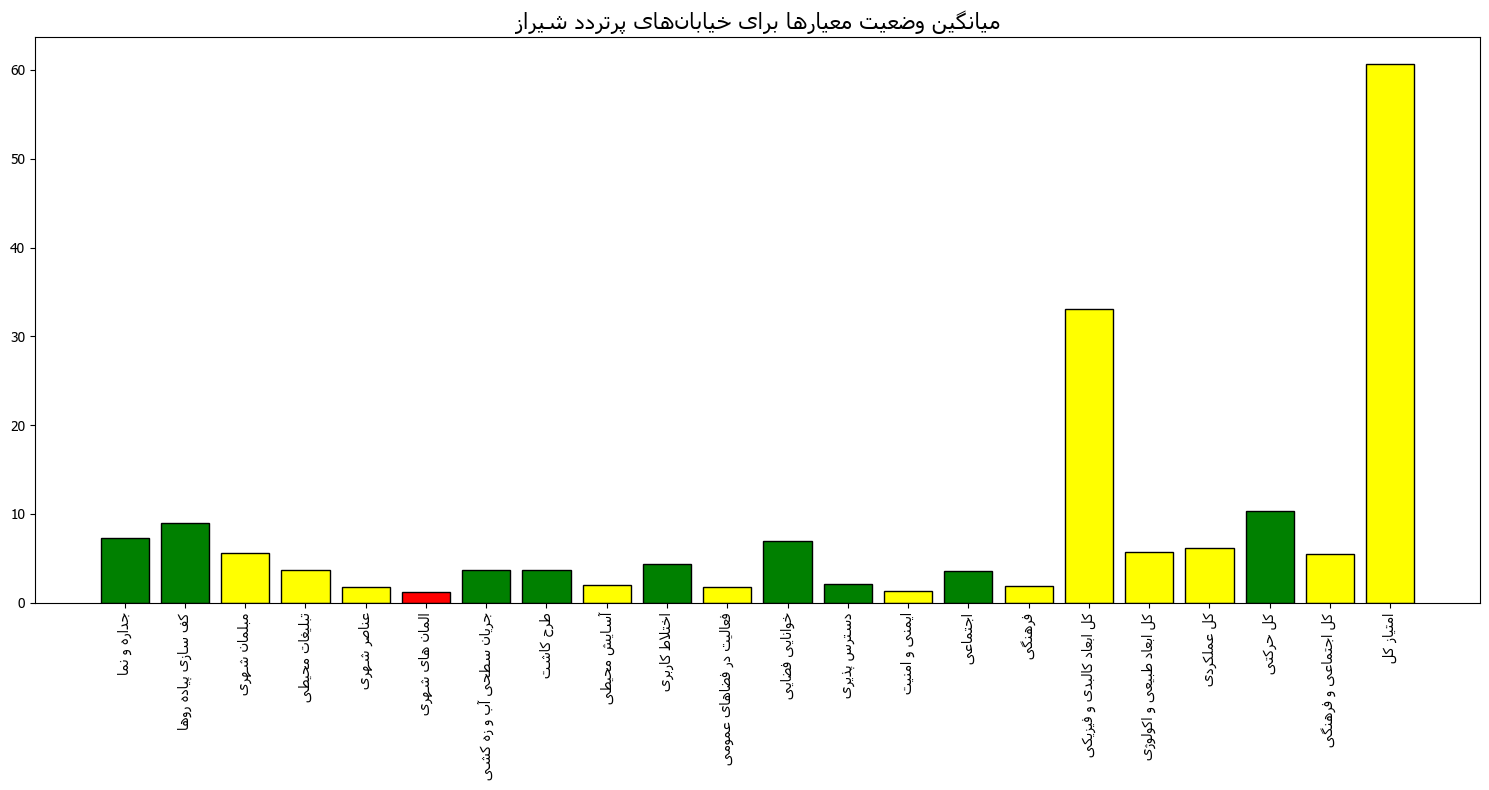

In [ ]:

plt.rcParams['font.family'] = 'Tahoma'


labels = [get_display(reshape(m)) for m in ci_df['معیار']]
values = ci_df['mean'].values

plt.figure(figsize=(15, 8))
plt.bar(labels,values,color=colors, edgecolor='black')
color_map = {'خوب': 'green', 'متوسط': 'yellow', 'ضعیف': 'red'}
colors = [color_map[s] for s in ci_df['status']]
plt.xticks(rotation=90)
plt.title(get_display(reshape("میانگین وضعیت معیارها برای خیابان‌های پرتردد شیراز")), fontsize=16)
plt.tight_layout()
plt.show()